In [1]:
import numpy as np
import pandas as pd
import re
from colorama import Fore, Back, Style

In [2]:
dataset = pd.read_excel('dataset/maya_dataset.xlsx', engine = 'openpyxl')

In [3]:
dataset = dataset.iloc[:, 0:2]

In [4]:
dataset.sample(5)

,posts,labels
83,প্রচুর মানসিক চাপে আছি... অযথা চিন্তা করি...বা...,3
832,জি না তেমন ভালো বোধ করছি না,1
3267,আমি মানসিকভাবে প্রচুর হতাশায় থাকি। নানান চিন্ত...,3
234,আমার মনে হচ্ছে আমি সবার সাতে খারাপ ব্যবহার করছি,1
3581,ইদানীং খুব বিষন্নতায় ভুগি ডিক মাপ হয়ে থাকে :( ...,2


### Removing Emojis

In [5]:
df_1 = dataset.copy()

In [6]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F97A"
        u"\U00002639"
        u"\U00002764"
        u"\U0001F642"
        u"\U0001F600-\U000E007F"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)
for i in range(df_1.shape[0]):
    df_1.iloc[i,0] = deEmojify(df_1.iloc[i,0])

### <span style="color:darksalmon">Removing nan Fields</span>

In [7]:
df_1.isnull().sum(axis = 0)

posts     0
labels    0
dtype: int64

### <span style="color:aqua">Removing Punctuations</span>

In [8]:
df_2 = df_1.copy()

In [9]:
def depunctuate(text):
    regrex_pattern = re.compile(pattern = "["u"\/"u"\\"u"\^"u"\!"u"\@"u"\+"u"\*"u"\="u"\%"u"\&"u"\:"u"\;"u"\_"u"\."u"\,"u"\("u"\)"u"\?"u"\।"u"\|"u"'"u"\-"u"\""u"]+")
    return regrex_pattern.sub(r' ',text)
for i in range(df_2.shape[0]):
    df_2.iloc[i,0] = depunctuate(df_2.iloc[i,0])

In [10]:
df_2.sample(5)

,posts,labels
4381,আমার ফুফির মন খারাপ কারন তার সামী তার সাথে ঝগড়...,1
3144,বিশ্বস্ত বা কোন ফ্রেন্ডের সাথেই কিছু শেয়ার করত...,1
1067,আমার বেস্টফ্রেন্ড সবসময় বিষন্ন থাকে এই বিষন্নত...,3
3595,আমার সমস্যাটা গত ৯ মাসের মাঝখানে বেশ কয়েকবার ...,4
2346,আমি গত দুই বছর ধরে কিছু মানসিক সমস্যায় ভুগছি ...,2


### <span style="color:red">Removing Numbers</span>

In [11]:
df_3 = df_2.copy()

In [12]:
def denumerize(text):
    regrex_pattern = re.compile(pattern = "[0-9০১২৩৪৫৬৭৮৯]+")
    return regrex_pattern.sub(r' ',text)
for i in range(df_3.shape[0]):
    df_3.iloc[i,0] = denumerize(df_3.iloc[i,0])

In [13]:
df_3.sample(5)

,posts,labels
3891,আফা আমার কোন কিছু করতে ভাল লাগে না এখন আমি কি ...,1
2914,মন ভাল রাখার জন্য কি করতে পারি হুট হাট মন...,1
4131,আপা আমার এক ফ্রেন্ডের সমস্যা সম্পর্কে পরামর্শ ...,1
1703,আমি ডিপ্রেশনে ভুগছি আমার স্বামীর সাথে সম্পর্ক...,2
762,কোনোকিছু ভালো লাগে না কারোর সাথে কথা বলতে ইচ্ছ...,4


### <span style="color:hotpink">Discarding all Posts Beyond the Range of Acceptable Length </span>

In [14]:
df_4 = df_3.copy()

In [15]:
def remove_empty_string_literals(string_list):
    while("" in string_list) :
        string_list.remove("")
    return string_list

In [16]:
df_4['length'] = [len(remove_empty_string_literals(post.split(' '))) for post in df_4.iloc[:, 0]] 

In [17]:
df_4.sample(5)

,posts,labels,length
1794,সবার সামনে হাসিখুশি থাকলেও একা একা খুব বিষণ্ণত...,2,9
3599,আমি যাকে ভালোবাসি তার সাথে অনেক ঝামেলা চলছে সে...,1,41
1495,বেশ কিছু দিন ধরে পারিবারিক অশান্তি নিয়ে আমি খু...,3,60
2603,কোন কিছু ভাল লাগেনা খুব অসস্তি লাগে,1,7
4473,আমি বছরের তরুণ কলেজে পড়ি কয়েক বছর ধরে আম...,3,50


In [18]:
# Defining an acceptable range for the length of posts -> inclusive
LOWER_BOUND = 5
UPPER_BOUND = 300
df_5 = df_4[(df_4['length'] >= LOWER_BOUND) == True]
df_5 = df_5[(df_5['length'] <= UPPER_BOUND) == True]
print(df_5.shape)

(4871, 3)


In [19]:
df_5.sample(5)

,posts,labels,length
3189,ভালো নেই মন মানসিকতা খুবই খারাপ ঘুম একটু ও হচ্...,1,10
2629,কোন গান শুনলে মন ভাল লাগবে ও হতাশা দূর হবে,2,10
2169,আমার বয়স আমার মানসিক সাস্থ ভালো যাচ্ছে না প...,1,17
1689,আপু আমি খুব বিষন্নতায় ভুগছি এর সমাধান কি,2,8
2174,ভাই আমি মানসিক ভাবে অসুস্থ ভিতরে অনেক কষ্ট,2,8


### <span style="color:orange">Tokenizing Dataset</span>

In [20]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
# Replace df_5 with df_x to revert the effects of text cleaning
x, y = df_5.iloc[:, 0:1].values, df_5.iloc[:, 1:2].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])

### <span style="color:deeppink">Visualizing Word Frequency Distribution</span>

In [21]:
words = [word for words in x for word in words]

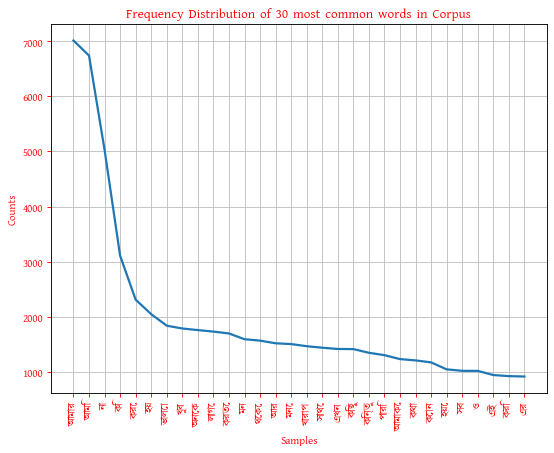

In [22]:
from nltk.probability import FreqDist
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
from matplotlib.pyplot import figure

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
figure(figsize=(8, 6), dpi=80)
font_dir = ['kalpurush/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'kalpurush'
rcParams.update({'text.color' : "red",
                 'axes.labelcolor' : "red",
                 'xtick.color' : "red",
                 'ytick.color' : "red",
                 'xtick.minor.width' : 2})
freq_dist = FreqDist(words)
freq_dist.plot(30, title = "Frequency Distribution of 30 most common words in Corpus")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### <span style="color:gold">Visualizing Post Length Frequency Distribution</span>

In [23]:
lens = [len(posts) for posts in x]
lens = pd.Series(lens, name = "post length")

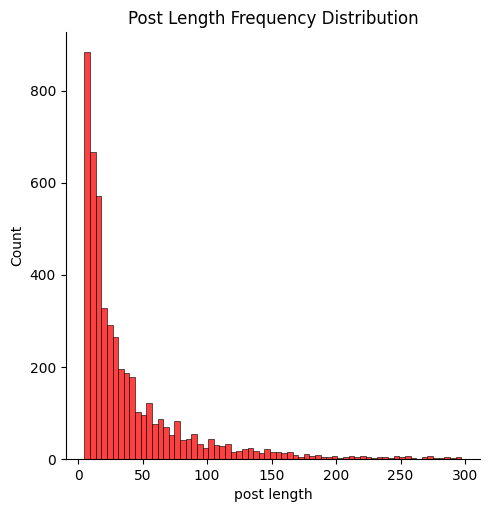

In [24]:
import seaborn as sns
sns.displot(lens, color = 'r').set(title = 'Post Length Frequency Distribution')
import matplotlib.pyplot as plt
plt.show()

### <span style="color:deepskyblue">Visualizing Label Counts</span>

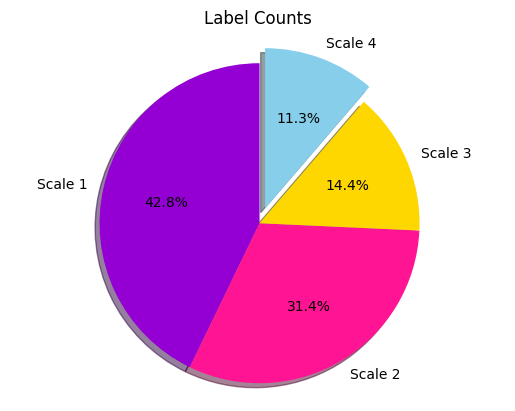

In [25]:
counts = df_3['labels'].value_counts().to_dict()
import matplotlib.pyplot as plt
labels = 'Scale 1', 'Scale 2', 'Scale 3', 'Scale 4'
sizes = [counts[1], counts[2], counts[3], counts[4]]
colors = ['#9400D3','#FF1493','#FFD700','#87CEEB']
explode = (0, 0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, 
        autopct = '%1.1f%%', 
        shadow = True, 
        startangle = 90,
        colors = colors)
ax1.axis('equal')
plt.title('Label Counts')
plt.show()

### <span style="color:crimson">Spell Correction using FastText</span>

<font>Source:
    https://medium.com/analytics-vidhya/bengali-word-spelling-correction-using-pre-trained-word2vec-1f9938f48b09
</font>

- letters = The Bengali script has a total of 9 vowels. Each of which is called a ‘স্বরবর্ণ’. Also, have 35 consonants that are known as ‘ব্যঞ্জনবর্ণ ‘.

- splits = It is working as a list which has both forward and reverses orders of the word sequence.

- deletes = Also, a list which checks the left and right of a word in splits list and deletes the incorrect syntax.

- transposes = It is used to change word places with each other words using the splits list.

- replaces = Is a list it put words back in a previous place or position.

- inserts = It helps to place and fit the correct words into the replacing with the incorrect word, especially with care.

In [26]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('models/cc.bn.300.vec')

In [27]:
words = model.index_to_key
word_rank = {}
for index, word in enumerate(words):
    word_rank[word] = index

In [28]:
# This methods returns the value for the given key, if present in the dictionary using the get() method
def P(word): 
    return - word_rank.get(word, 0)

#  It returns the maximum candidates words with a key which is defined by P
def correction(word): 
    return max(candidates(word), key=P)

# The absolute candidate of the wrong word could found from known() methods is the actual work of this function.
def candidates(word): 
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

# This method is used to find out the set of a word which is present in the dictionary
def known(words): 
    return set(w for w in words if w in word_rank)

# Many parameters such as deletes, transposes, replaces, inserts are used in this method.
# Those parameters return the correct word of an incorrect word in a sentence.
# A set() function is used to find out the unordered collection of words
def edits1(word):
    letters    = 'ঁংঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ঽািীুূৃৄেৈোৌ্ৎৗড়ঢ়য়'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)
    
#  This method is returend the word which is edited by in edits1() functions
def edits2(word): 
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [29]:
def spell_correction(sentence):
    corrected_sentence = []
    for word in sentence:
        corrected_sentence.append(correction(word))
    return re.sub(' +' ,' ', ' '.join(corrected_sentence))

In [30]:
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
x = df_5.iloc[:, 0:1].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])
for i in range(df_5.shape[0]):
    df_5.iloc[i, 0] = spell_correction(x[i])

In [31]:
df_5.sample(5)

,posts,labels,length
2422,আমি বেশ কয়েক বছর যাব তো মানসিক ডিপ্রেশনে ভুগছ...,3,27
3140,আপু আমি সব সময়ই বিষন্নতা ভুগি সামান্য বিষয়ে ম...,2,16
1566,মন খারাপ থাকলে আমার কি করা উচিৎ,1,7
130,কোন কাজ করতে মন চায় না কিন্তু পরিবারে অামি ছাড়...,1,16
2839,মানসিক কারনে ওষুদ খেয়েছি সাত দিন পরে পাথার পিছ...,3,18


### <span style="color:coral">Removing Stopwords</span>

In [32]:
from bnlp.corpus.util import remove_stopwords

In [33]:
file = open('stopwords/stopwords-bn.txt', encoding = 'utf-8')
stopwords = []
for line in file:
    stopwords.append(line.strip())
file.close()
stopwords = list(filter(None, stopwords))

In [34]:
df_6 = df_5.iloc[:, 0:2].copy()

In [35]:
 for i in range(df_6.shape[0]):
     df_6.iloc[i, 0] = ' '.join(remove_stopwords(df_6.iloc[i, 0], stopwords))

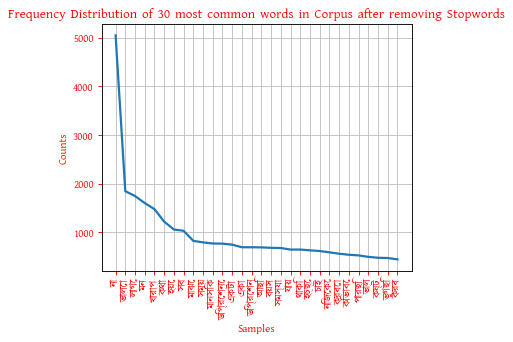

In [36]:
# Revisualizing Word Frequency Distribution after removing Stopwords
from bnlp import BasicTokenizer
tokenizer = BasicTokenizer()
# Replace df_5 with df_x to revert the effects of text cleaning
x, y = df_6.iloc[:, 0:1].values, df_6.iloc[:, 1:2].values
x = x.tolist()
for i in range(len(x)):
    x[i] = tokenizer.tokenize(x[i][0])

words = [word for words in x for word in words]

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
figure(figsize=(5, 4), dpi=80)
font_dir = ['kalpurush/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'kalpurush'
rcParams.update({'text.color' : "red",
                 'axes.labelcolor' : "red",
                 'xtick.color' : "red",
                 'ytick.color' : "red",
                 'xtick.minor.width' : 2})
freq_dist = FreqDist(words)
freq_dist.plot(30, title = "Frequency Distribution of 30 most common words in Corpus after removing Stopwords")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

### <span style="color:gold">Creating Sparse Matrix</span>

In [37]:
corpus = df_6.iloc[:, 0].values
y = df_6.iloc[:, 1].values

In [38]:
df_6.sample(5)

,posts,labels
2856,না না মন খারাপ হয়ে যায় সহজে মন টা ভালো হয়না করব,1
3989,সারা খন মন খারাপ,2
3951,ক্লাস ফাইভ হস্তমৈথুন করতাম একটা নেশা হয়ে দাড়ায়...,2
1425,বয়স অবিবাহিত সবসময় বিষন্নতা অবসাদে ভুগি মন খার...,2
1668,ডিপ্রেশন পিছু ছাড়তে না,2


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(corpus, y, test_size=0.2)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
x_train = cv.fit_transform(x_train).toarray()
x_test = cv.transform(x_test)

### <span style="color:cyan">Creating TF-IDF Feature Vector</span>

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test=train_test_split(corpus, y, test_size=0.2)

In [41]:
tf_idf = TfidfVectorizer(encoding = 'utf-8', lowercase = False, norm = 'l2', sublinear_tf = True, min_df = 2, ngram_range = (1, 2))
x_tfidf_train = tf_idf.fit_transform(x_tfidf_train).toarray().tolist()
x_tfidf_test = tf_idf.transform(x_tfidf_test).toarray().tolist()

### <span style="color:purple">Classification using Naive Bayes</span>

In [42]:

from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_test, y_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_test, y_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_test, y_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.60      0.66       426
           2       0.61      0.71      0.65       292
           3       0.48      0.44      0.46       152
           4       0.46      0.63      0.53       105

    accuracy                           0.61       975
   macro avg       0.57      0.59      0.58       975
weighted avg       0.62      0.61      0.61       975

Confusion Matrix
[[256  73  46  51]
 [ 56 206  19  11]
 [ 23  47  67  15]
 [ 17  14   8  66]]

F1 score (macro): 0.5752896486644267
F1 score (weighted): 0.6116354525203708
F1 score (micro): 0.6102564102564103
Accuracy: 0.6102564102564103


### <span style="color:red">Classification with SVM using GridSearchCV</span>

- <span style="color:white">Using Bag of Words</span>

In [44]:
corpus = df_6.iloc[:, 0].values
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(corpus).toarray()
y = df_6.iloc[:, 1].values
## Label encoding Y
#from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown = 'ignore')
# enc.fit(y)
# y = enc.transform(y).toarray()[:, :-1]

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20)

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [0.8, 1, 1.2], 'kernel' : ['linear',]},
              {'C' : [32.75, 33, 33.25], 'kernel' : ['rbf',], 'gamma' : [0.008, 0.009, 0.01]},
#              {'C' : [0.1, 1, 10, 100, 500, 1000], 'kernel' : ['poly',], 'degree' : [2, 3, 4, 5, 6], 'gamma' : [0.1,0.3,0.5,0.7,0.9], 'coef0' : [1, 10, 50, 100]},
#              {'C' : [0.1, 1, 10, 100, 500, 1000], 'kernel' : ['sigmoid',], 'gamma' : [0.1,0.3,0.5,0.7,0.9], 'coef0' : [0.0, 0.5, 1, 10, 50, 100]},
             ]

In [47]:
grid_search = GridSearchCV(estimator = SVC(probability = False, verbose = True, decision_function_shape = 'ovo'), param_grid = parameters, scoring = 'f1_macro', cv = 5, n_jobs = 5, verbose = 5)
grid_search = grid_search.fit(x_train, y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LibSVM]

In [48]:
print(best_score)
print(best_parameters)

0.6946261397666952
{'C': 32.75, 'gamma': 0.009, 'kernel': 'rbf'}


In [49]:
from sklearn.svm import SVC
classifier = SVC(verbose = True, decision_function_shape = 'ovo', C = 33, kernel = 'rbf', gamma = 0.01)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_test, y_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_test, y_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_test, y_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_test, y_pred))

[LibSVM]Classification Report
              precision    recall  f1-score   support

           1       0.78      0.89      0.83       419
           2       0.68      0.73      0.70       283
           3       0.62      0.42      0.50       153
           4       0.84      0.62      0.71       120

    accuracy                           0.74       975
   macro avg       0.73      0.67      0.69       975
weighted avg       0.73      0.74      0.73       975

Confusion Matrix
[[372  30  14   3]
 [ 58 207  12   6]
 [ 30  53  65   5]
 [ 17  15  14  74]]

F1 score (macro): 0.6874633015102285
F1 score (weighted): 0.7278485985009113
F1 score (micro): 0.7364102564102565
Accuracy: 0.7364102564102564


- <span style="color:white">Using Tf-idf</span>

In [50]:
from sklearn.svm import SVC
classifier = SVC(verbose = True, decision_function_shape = 'ovr', C = 33, kernel = 'rbf', gamma = 0.1)
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

[LibSVM]Classification Report
              precision    recall  f1-score   support

           1       0.79      0.87      0.83       420
           2       0.73      0.72      0.72       319
           3       0.55      0.43      0.48       142
           4       0.74      0.67      0.70        94

    accuracy                           0.74       975
   macro avg       0.70      0.67      0.69       975
weighted avg       0.73      0.74      0.73       975

Confusion Matrix
[[367  29  20   4]
 [ 57 230  25   7]
 [ 24  46  61  11]
 [ 14  12   5  63]]

F1 score (macro): 0.6853985099992876
F1 score (weighted): 0.7332194728510968
F1 score (micro): 0.7394871794871795
Accuracy: 0.7394871794871795


### <span style="color:pink">Random Forest + TF-IDF</span>

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(np.reshape(y_tfidf_train, y_tfidf_train.shape[0])),
                                                 np.reshape(y_tfidf_train, y_tfidf_train.shape[0]))
class_weights = {1 : class_weights[0],
               2 : class_weights[1],
               3 : class_weights[2],
               4 : class_weights[3]}
classifier = RandomForestClassifier(n_estimators = 8000, verbose = 1, class_weight = class_weights,
                                    n_jobs = 3)
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

C:\ProgramData\Anaconda3\envs\virtual\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[1 2 3 4], y=[1 4 4 ... 1 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.9s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    8.4s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   18.9s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:   33.9s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:   53.7s
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done 4994 tasks 

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.94      0.82       420
           2       0.71      0.74      0.72       319
           3       0.69      0.19      0.30       142
           4       0.88      0.55      0.68        94

    accuracy                           0.73       975
   macro avg       0.75      0.61      0.63       975
weighted avg       0.73      0.73      0.70       975

Confusion Matrix
[[396  19   5   0]
 [ 77 237   3   2]
 [ 42  68  27   5]
 [ 27  11   4  52]]

F1 score (macro): 0.6315341422536562
F1 score (weighted): 0.7007605398590669
F1 score (micro): 0.7302564102564103
Accuracy: 0.7302564102564103


[Parallel(n_jobs=3)]: Done 8000 out of 8000 | elapsed:    2.8s finished


### <span style="color:purple">Logistic Regression + TF-IDF</span>

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(np.reshape(y_tfidf_train, y_tfidf_train.shape[0])),
                                                 np.reshape(y_tfidf_train, y_tfidf_train.shape[0]))
class_weights = {1 : class_weights[0],
               2 : class_weights[1],
               3 : class_weights[2],
               4 : class_weights[3]}
classifier = LogisticRegression(verbose = 0, class_weight = class_weights, multi_class = 'multinomial')
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

C:\ProgramData\Anaconda3\envs\virtual\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[1 2 3 4], y=[1 4 4 ... 1 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Classification Report
              precision    recall  f1-score   support

           1       0.81      0.82      0.81       420
           2       0.76      0.69      0.72       319
           3       0.49      0.54      0.52       142
           4       0.66      0.73      0.69        94

    accuracy                           0.73       975
   macro avg       0.68      0.70      0.69       975
weighted avg       0.73      0.73      0.73       975

Confusion Matrix
[[343  34  32  11]
 [ 46 221  40  12]
 [ 19  33  77  13]
 [ 14   4   7  69]]

F1 score (macro): 0.6870942390869015
F1 score (weighted): 0.7297638057330924
F1 score (micro): 0.7282051282051283
Accuracy: 0.7282051282051282


### <span style="color:skyblue">KNN Classifier + TF-IDF</span>

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_tfidf_train, y_tfidf_train)
y_tfidf_pred = classifier.predict(x_tfidf_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_tfidf_test, y_tfidf_pred)
cr = classification_report(y_tfidf_test, y_tfidf_pred)
print('Classification Report', cr, sep = '\n')
print('Confusion Matrix', cm, '', sep = '\n')
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print(Fore.RED+'F1 score (macro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'macro'))
print(Fore.RED+'F1 score (weighted):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'weighted'))
print(Fore.RED+'F1 score (micro):', f1_score(y_tfidf_test, y_tfidf_pred, average = 'micro'))
print(Fore.RED+'Accuracy:', accuracy_score(y_tfidf_test, y_tfidf_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.48      0.97      0.64       420
           2       0.79      0.29      0.42       319
           3       0.50      0.02      0.04       142
           4       0.00      0.00      0.00        94

    accuracy                           0.52       975
   macro avg       0.44      0.32      0.28       975
weighted avg       0.54      0.52      0.42       975

Confusion Matrix
[[408  10   1   1]
 [226  92   1   0]
 [128  11   3   0]
 [ 90   3   1   0]]

F1 score (macro): 0.2762596200624828
F1 score (weighted): 0.42064005369665747
F1 score (micro): 0.5158974358974359
Accuracy: 0.5158974358974359
